## Performing ANCOVA
This notebook demonstrates how to perform ANCOVA analysis (like ANOVA and linear regression at once). The example data shows a predictor (x) and two responses (y1, y2) variables for two different groups (treatment or control).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.DataFrame({'x': [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6], 'y1': [0.5, 1.1, 1.4, 1.9, 2.6, 3.1, 0.9, 1.9, 3.2, 4.1, 4.9, 5.2],
                          'y2': [0.5, 1.1, 1.4, 1.9, 2.6, 3.1, 0.9, 1.4, 2.1, 2.4, 2.9, 3.6], 'group': ['control']*6 + ['treatment']*6})
dataframe

,x,y1,y2,group
0,1,0.5,0.5,control
1,2,1.1,1.1,control
2,3,1.4,1.4,control
3,4,1.9,1.9,control
4,5,2.6,2.6,control
5,6,3.1,3.1,control
6,1,0.9,0.9,treatment
7,2,1.9,1.4,treatment
8,3,3.2,2.1,treatment
9,4,4.1,2.4,treatment


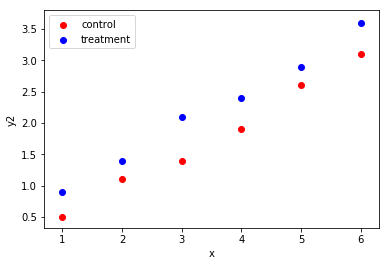

In [3]:
# let's plot y2 vs x
control = dataframe.group=='control'
treatment = dataframe.group=='treatment'
plt.scatter(dataframe.x[control],dataframe.y2[control],color='r')
plt.scatter(dataframe.x[treatment],dataframe.y2[treatment],color='b')
plt.xlabel('x')
plt.ylabel('y2')
plt.legend(['control','treatment'])
plt.show()

In [4]:
# notice that the two groups look like they have the same slope but different y-intercepts.
# let's test the null hypothesis that the treatement has a different y-interept than the control.

In [5]:
from statsmodels.formula.api import ols
formula = 'y2 ~ x * group'
model = ols(formula, dataframe)
fit = model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     300.4
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           1.47e-08
Time:                        16:09:00   Log-Likelihood:                 12.400
No. Observations:                  12   AIC:                            -16.80
Df Residuals:                       8   BIC:                            -14.86
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0333 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [6]:
# look at the p-value in the x:group[T.treatment] row. it is very large. This means that there is no statistically 
# significant difference in the slopes of the two data sets. We accept the null, the slopes are homogeneous.
# But, if we look at the group[T.treatment] row we see that there is a statistically significant difference. So
# the treatment is always bigger than the control.

In [7]:
# now let's look at y1 vs x
# notice that the two groups look like they have the same y-intercepts but different slopes.
# let's test the null hypothesis that the treatement has a different slope than the control.

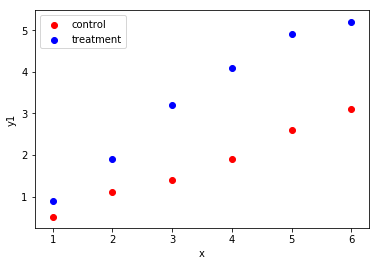

In [8]:
# let's plot y1 vs x
control = dataframe.group=='control'
treatment = dataframe.group=='treatment'
plt.scatter(dataframe.x[control],dataframe.y1[control],color='r')
plt.scatter(dataframe.x[treatment],dataframe.y1[treatment],color='b')
plt.xlabel('x')
plt.ylabel('y1')
plt.legend(['control','treatment'])
plt.show()

In [9]:
from statsmodels.formula.api import ols
formula = 'y1 ~ x * group'
model = ols(formula, dataframe)
fit = model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     148.8
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           2.35e-07
Time:                        16:09:00   Log-Likelihood:                 2.3747
No. Observations:                  12   AIC:                             3.251
Df Residuals:                       8   BIC:                             5.190
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0333 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [10]:
# notice that the p-value for x:group[T.treatment] is less than 0.05 so we reject the null hypothesis and accept the alternative
# that the control and treatment data for y1 have different slopes.